### Solpositionsmodellering ved Pvlib

I Python kan solpositionsvinklerne, benævnt $(\theta_s, \phi_s)$, nemt beregnes på ethvert sted ved hjælp af solar positionsalgoritmen (SPA) med pakken `pvlib`, der som standard er implementeret med National Renewable Energy Laboratory's SPA-algoritme [Reda og Andreas, 2003, https://www.nrel.gov/docs/fy08osti/34302.pdf]). Vi følger https://assessingsolar.org/notebooks/solar_position.html.

In [1]:
import pandas as pd
import pvlib
from pvlib.location import Location

Vi skal først have defineret observatørens/panelets geografiske placering. Det gøres via objektet *pvlib.location.Location* i biblioteket *[pvlib](https://pvlib-python.readthedocs.io/en/stable/index.html)*, hvor vi skal angive bl.a. breddegrad, længdegrad, tidszone og højde. Til simulering bruges data for $(\theta_s, \phi_s)$ fra fx kalenderåret 2024, men her i denne indledende øvelse nøjes vi med data for nuværende måned, april 2024:

In [2]:
tidszone = "Europe/Copenhagen"
start_dato = "2024-01-01"
slut_dato = "2024-12-31"
delta_tid = "Min"  # "Min", "H",

# Latitude, Longitude, Tidszone, Højde over havets vandoverfladen, Navn på stedet
site = Location(
    55.786327, 12.524295, tidszone, 40, "Bygning 101 DTU (DK)"
)

# Definition of a time range of simulation
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:00", inclusive="left", freq=delta_tid, tz=tidszone
)

## Opgave 1
> Vælg placering/lokation for jeres solpanel, fx DTU. Ret overstående GPS koordinater (målt i DecimalDegrees), højde og navn så det passer med den valgte lokation.

In [3]:
#Valgte 55.786327, 12.524295, hvilket er Bygning 101 på DTU.
#Valgte højden til at være 30, fordi gennemsnits højden af danmark er omkring 30 m
#(https://da.wikipedia.org/wiki/Danmarks_geografi)

Vi kan nu finde solpositionen ud fra det horisontale koordinatsystem placering i `site` for det angivne tidsinterval ved følgende kald

In [4]:
# Estimate Solar Position with the 'Location' object
solpos = site.get_solarposition(times)

# Visualize the resulting DataFrame
solpos.head()

apparent_zenith      zenith  apparent_elevation  \
2024-01-01 00:00:00+01:00       147.189141  147.189141          -57.189141   
2024-01-01 00:01:00+01:00       147.202057  147.202057          -57.202057   
2024-01-01 00:02:00+01:00       147.213938  147.213938          -57.213938   
2024-01-01 00:03:00+01:00       147.224782  147.224782          -57.224782   
2024-01-01 00:04:00+01:00       147.234588  147.234588          -57.234588   

                           elevation     azimuth  equation_of_time  
2024-01-01 00:00:00+01:00 -57.189141  354.492460         -3.055576  
2024-01-01 00:01:00+01:00 -57.202057  354.916206         -3.055906  
2024-01-01 00:02:00+01:00 -57.213938  355.340197         -3.056235  
2024-01-01 00:03:00+01:00 -57.224782  355.764414         -3.056565  
2024-01-01 00:04:00+01:00 -57.234588  356.188836         -3.056895

Vi ser at DataFramen indeholder solpositionen for hvert minut i april 2024. Tids-samplingen $\Delta t$ kan styres ved `delta_tid = "Min"` (minute) sat ovenfor. Når vi senere skal udregne energiproduktionen over hele 2024, kan det være tilstrækkeligt med at kende solpositionen for hver time (for hele året 2024), DataFramen bliver nemlig meget stor, hvis man bruger `delta_tid = "Min"` for et helt år. Dette klares ved `delta_tid = "H"` (hour). Bemærk at `delta_tid = "M"` (month) sætter $\Delta t$ til en måned (hvilket er for stort til vores behov).

Efter at solvinklerne er estimeret ved hjælp af `pvlib`, kan de visualiseres, fx for den 1. april:

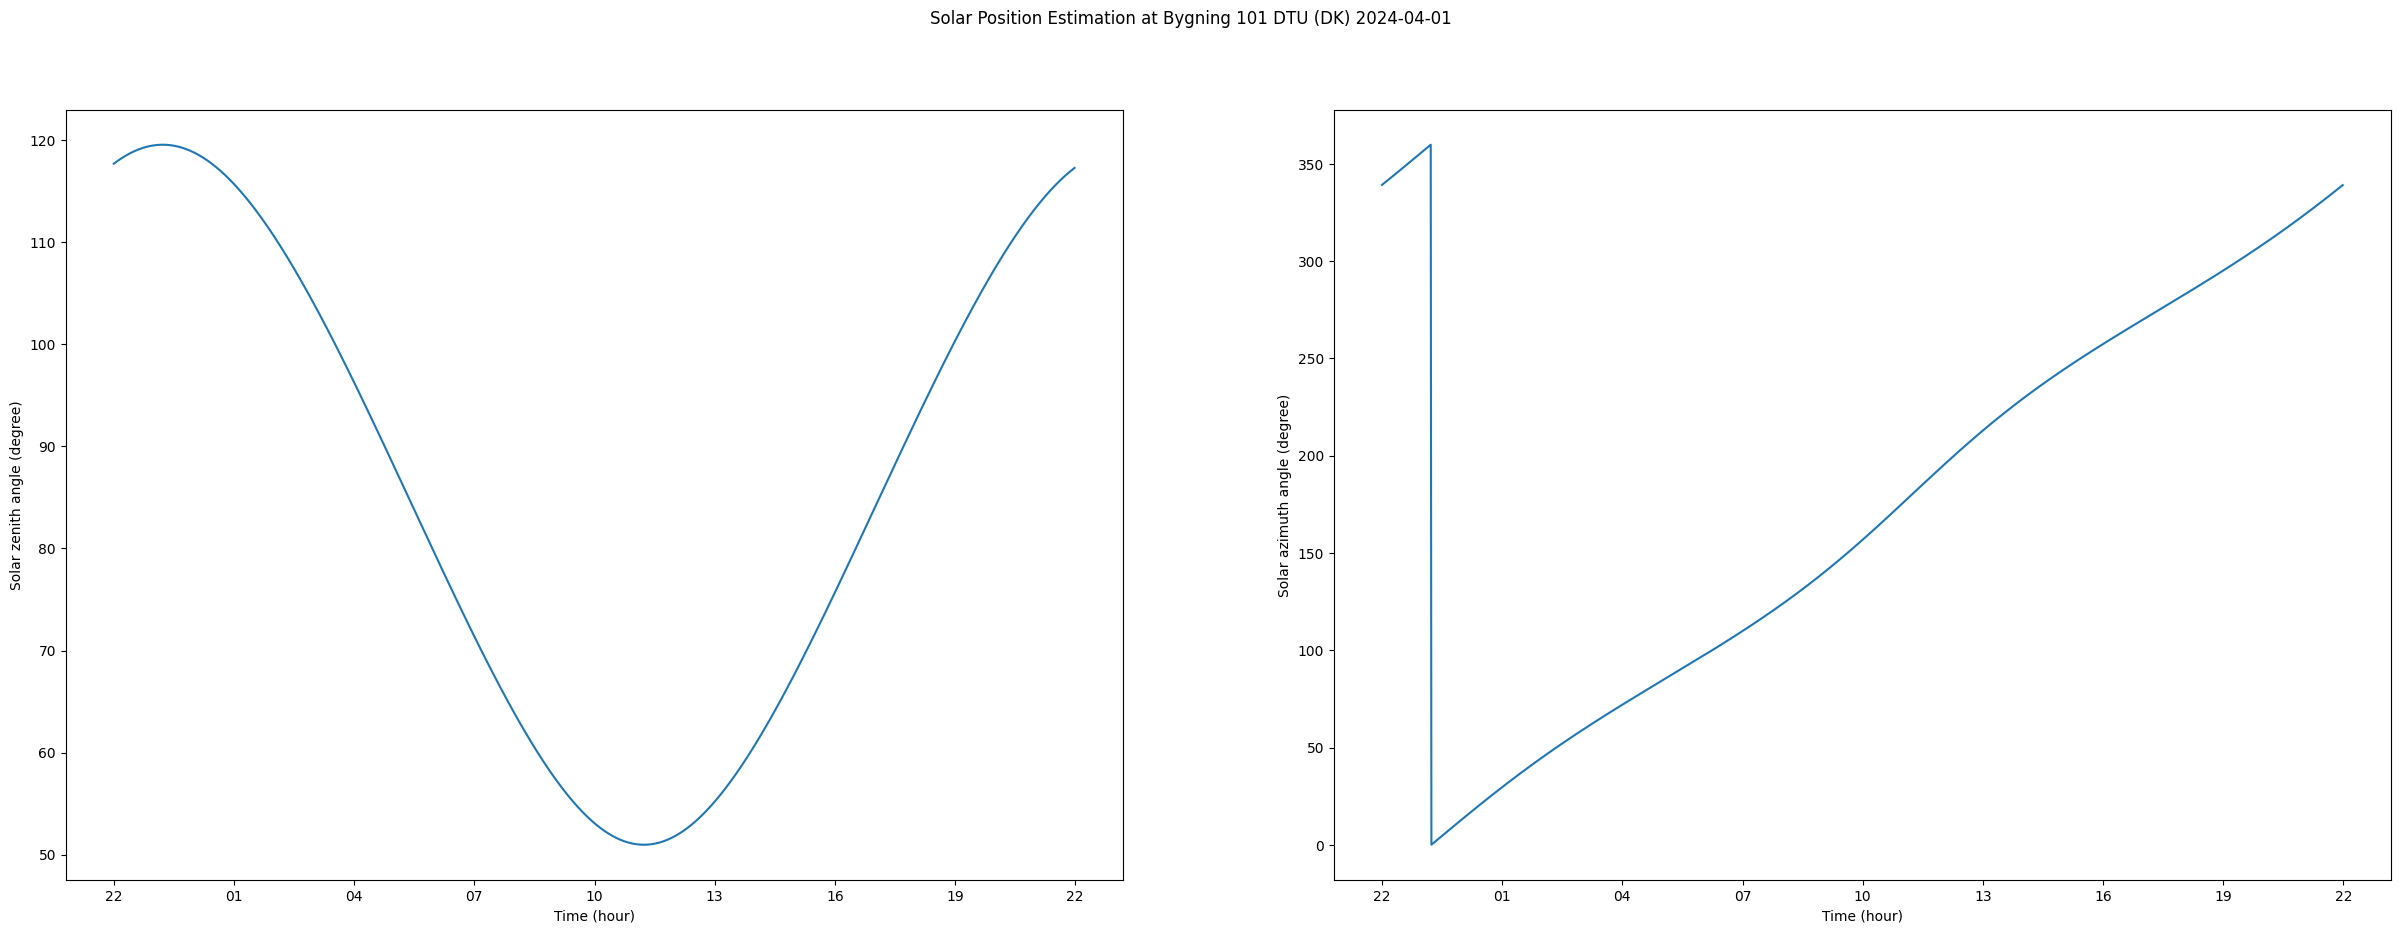

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

valgt_dato = "2024-04-01"

# Plots for solar zenith and solar azimuth angles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle(f"Solar Position Estimation at {site.name} {valgt_dato}")

# plot for solar zenith angle
ax1.plot(solpos.loc[valgt_dato].zenith)
ax1.set_ylabel("Solar zenith angle (degree)")
ax1.set_xlabel("Time (hour)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

# plot for solar azimuth angle
ax2.plot(solpos.loc[valgt_dato].azimuth)
ax2.set_ylabel("Solar azimuth angle (degree)")
ax2.set_xlabel("Time (hour)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

Bemærk at $x$-aksen bruger UTC-tidszone og der derfor skal $+2$ for at få dansk tid. De plottede vektorer kan udskrives:

In [6]:
valgt_dato = "2024-04-01"
print(solpos.loc[valgt_dato].zenith)
print(solpos.loc[valgt_dato].elevation)
print(solpos.loc[valgt_dato].azimuth)

2024-04-01 00:00:00+02:00    117.721397
2024-04-01 00:01:00+02:00    117.770901
2024-04-01 00:02:00+02:00    117.819770
2024-04-01 00:03:00+02:00    117.868004
2024-04-01 00:04:00+02:00    117.915599
                                ...    
2024-04-01 23:55:00+02:00    117.103895
2024-04-01 23:56:00+02:00    117.156152
2024-04-01 23:57:00+02:00    117.207785
2024-04-01 23:58:00+02:00    117.258793
2024-04-01 23:59:00+02:00    117.309172
Freq: T, Name: zenith, Length: 1440, dtype: float64
2024-04-01 00:00:00+02:00   -27.721397
2024-04-01 00:01:00+02:00   -27.770901
2024-04-01 00:02:00+02:00   -27.819770
2024-04-01 00:03:00+02:00   -27.868004
2024-04-01 00:04:00+02:00   -27.915599
                               ...    
2024-04-01 23:55:00+02:00   -27.103895
2024-04-01 23:56:00+02:00   -27.156152
2024-04-01 23:57:00+02:00   -27.207785
2024-04-01 23:58:00+02:00   -27.258793
2024-04-01 23:59:00+02:00   -27.309172
Freq: T, Name: elevation, Length: 1440, dtype: float64
2024-04-01 00:00:00+02:0

## Opgave 2

> Plot solens zenit-, azimut- og elevationsvinkel, dvs. $\theta_s, \phi_s, \alpha_s$, for hele dagen den 20. april 2024 som funktion af tiden. 

**Anbefaling:** I det følgende har vi brug af at arbejde med vektorer af fx zenit- og azimut-vikler, specielt at kunne finde maksimumsværdier, nulpunkter, integrere, osv. Det anbefales derfor at arbejde med dataen fra `solpos` som NumPy-arrays. Dette kan gøres ved fx:

In [7]:
import numpy as np
np.array(solpos.loc[valgt_dato].elevation)

array([-27.72139682, -27.77090075, -27.81977026, ..., -27.20778521,
       -27.25879257, -27.30917235])

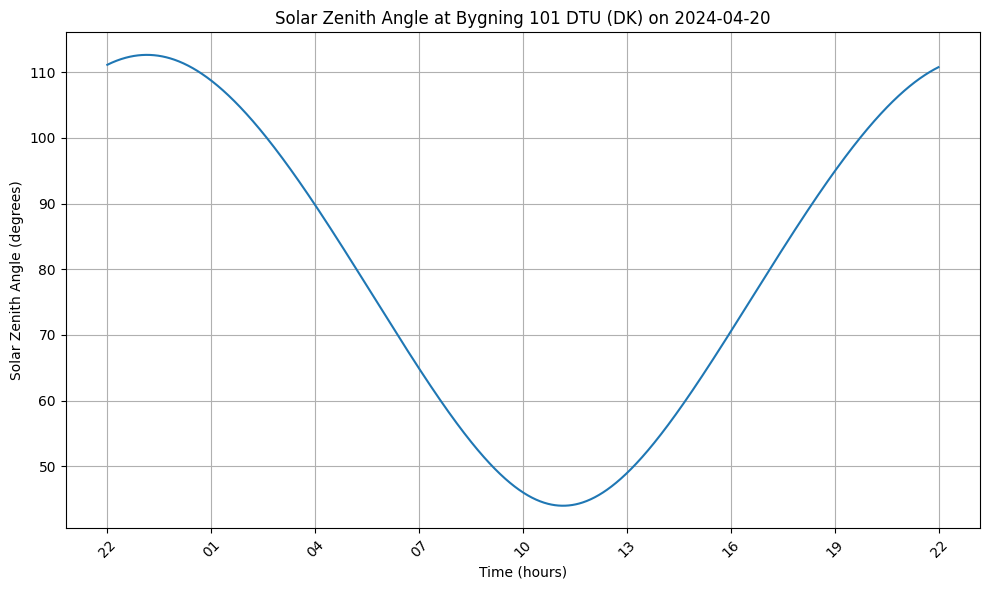

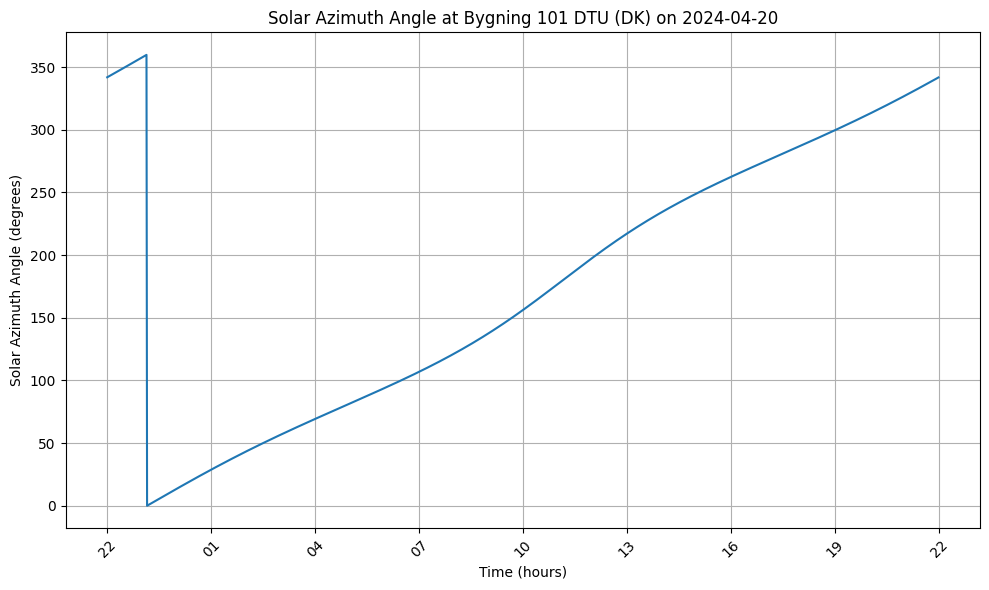

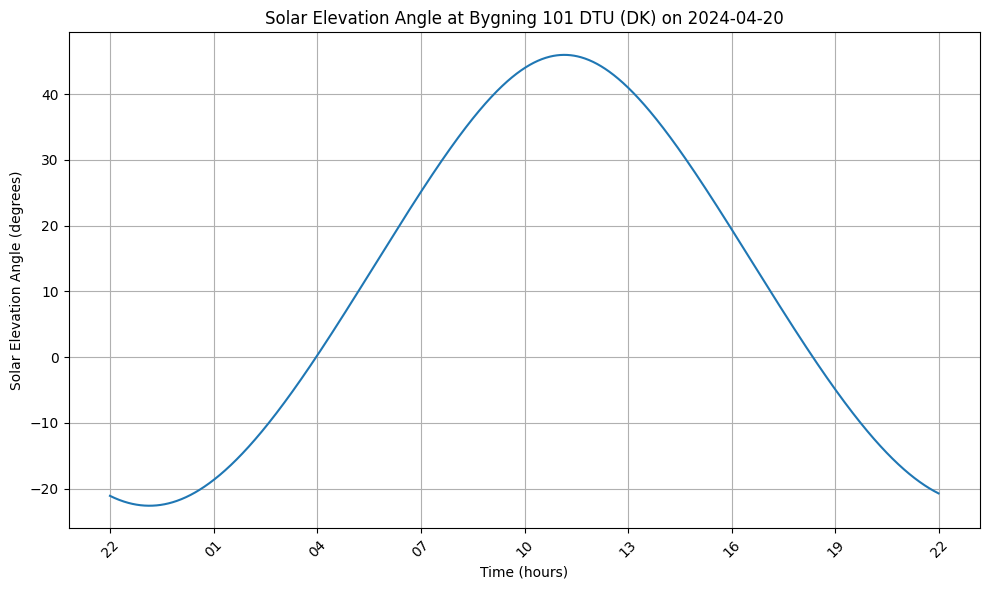

In [8]:
# Extract relevant data
valgt_dato = "2024-04-20"

# Define angles and corresponding labels
angles = {
    'Solar Zenith Angle': 'zenith', 
    'Solar Azimuth Angle': 'azimuth',
    'Solar Elevation Angle': 'elevation'
}

# Function to calculate elevation angle
def solar_elevation_angle(theta):
    alpha = 90 - theta
    return alpha
solpos['elevation'] = solpos['zenith'].apply(solar_elevation_angle)

# Plot each angle
for angle_name, angle_data in angles.items():
    plt.figure(figsize=(10, 6))
    plt.plot(solpos.loc[valgt_dato].index, solpos.loc[valgt_dato][angle_data])
    plt.title(f"{angle_name} at {site.name} on {valgt_dato}")
    plt.xlabel("Time (hours)")
    plt.ylabel(f"{angle_name} (degrees)")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H"))
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Opgave 3
> Plot solens elevationsvinkel og find ud af hvornår på dagen solen står højest den 20. april 2024. Forklar hvad det betyder når $\alpha_s < 0$ eller $\theta_s > 90^\circ$.

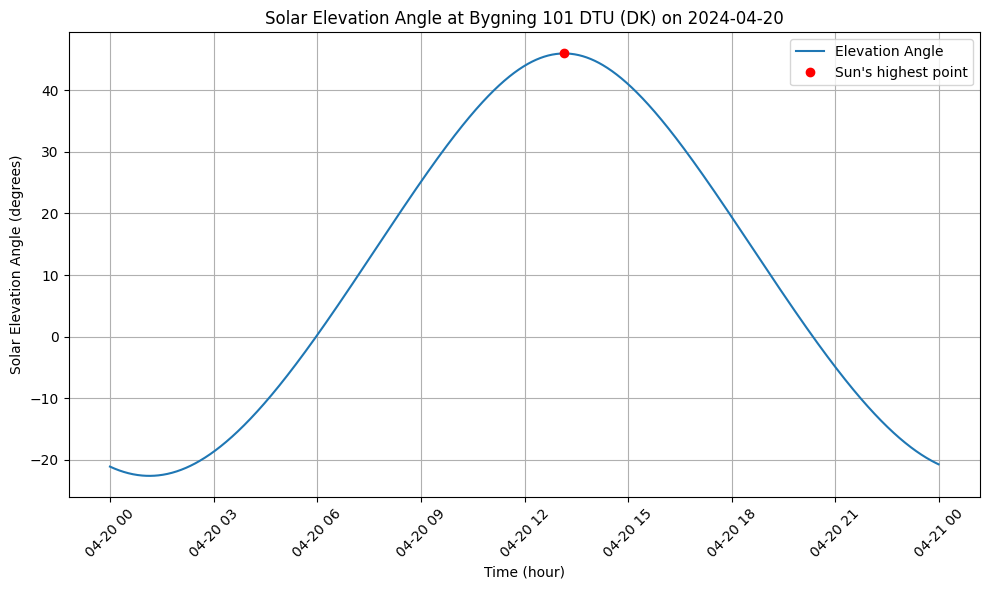

Time of highest elevation: 2024-04-20 13:09:00


In [9]:
from scipy.signal import find_peaks

# Extract relevant data
valgt_dato = "2024-04-20"

# Find local maxima (highest points) in the elevation angle data
elevation_data = solpos.loc[valgt_dato]['elevation'].values
maxima_indices, _ = find_peaks(elevation_data)

# Plot the elevation angle data
plt.figure(figsize=(10, 6))
plt.plot(solpos.loc[valgt_dato].index, elevation_data, label='Elevation Angle')

# Plot markers for the local maxima
maxima_times = solpos.loc[valgt_dato].index[maxima_indices]
maxima_elevations = elevation_data[maxima_indices]
plt.plot(maxima_times, maxima_elevations, 'ro', label="Sun's highest point")

plt.title(f"Solar Elevation Angle at {site.name} on {valgt_dato}")
plt.xlabel("Time (hour)")
plt.ylabel("Solar Elevation Angle (degrees)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Time of highest elevation:", maxima_times[0].strftime('%Y-%m-%d %H:%M:%S'))

Når $\alpha_s < 0$ eller $\theta_s > 90^\circ$ betyder det at solen er stået op over horisonten.

## Opgave 4
> Find tidspunktet for solopgang og solnedgang på DTU den 20. april 2024. Sammenlign med "kendte" værdier fx fra DMI. *Hint:* Hvis I ønsker præcise værdier skal I bruge `apparent_elevation` (apparent sun elevation accounting for atmospheric refraction) i stedet for `elevation`. I behøver ikke tage højde for jordens krumning.

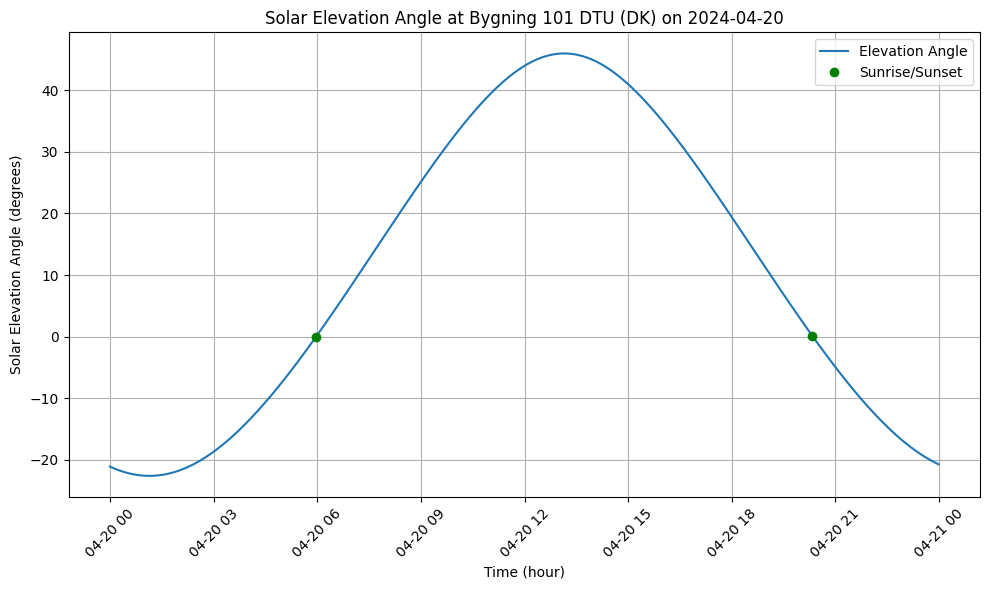

Time for sunrise: 2024-04-20 05:58:00
Time for sunset: 2024-04-20 20:20:00


In [10]:
from scipy.signal import find_peaks

# Extract relevant data
valgt_dato = "2024-04-20"

# Find points where elevation angle crosses zero
elevation_data = solpos.loc[valgt_dato]['elevation'].values
zero_crossings_indices = np.where(np.diff(np.sign(elevation_data)))[0]

# Plot the elevation angle data
plt.figure(figsize=(10, 6))
plt.plot(solpos.loc[valgt_dato].index, elevation_data, label='Elevation Angle')

# Plot markers for zero crossings (sunrise and sunset)
zero_crossings_times = solpos.loc[valgt_dato].index[zero_crossings_indices]
zero_crossings_elevations = elevation_data[zero_crossings_indices]
plt.plot(zero_crossings_times, zero_crossings_elevations, 'go', label='Sunrise/Sunset')

plt.title(f"Solar Elevation Angle at {site.name} on {valgt_dato}")
plt.xlabel("Time (hour)")
plt.ylabel("Solar Elevation Angle (degrees)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Time for sunrise:", zero_crossings_times[0].strftime('%Y-%m-%d %H:%M:%S'))
print("Time for sunset:", zero_crossings_times[1].strftime('%Y-%m-%d %H:%M:%S'))

DMI siger at solen står op kl 05:51 og går ned kl 20:27

Så 7 min for sent ved solopgang og 7 min for tidligt ved solnedgang

## Opgave 5
> Find solens højeste punkt på himlen (i grader) på sommersolhverv på DTU, og hvornår på dagen det sker? *Hint:* Du bliver nødt til at ændre på start og slut dato for `solpos`-objektet.

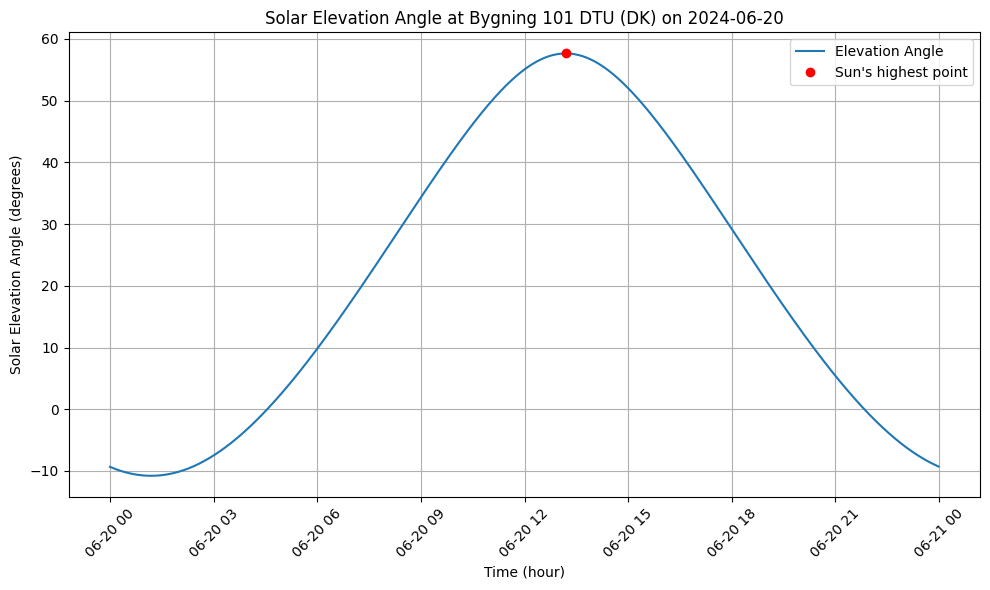

Highest elevation angle: 57.65°


In [11]:
from scipy.signal import find_peaks

# Extract relevant data
valgt_dato = "2024-06-20"

# Find local maxima (highest points) in the elevation angle data
elevation_data = solpos.loc[valgt_dato]['elevation'].values
maxima_indices, _ = find_peaks(elevation_data)

# Plot the elevation angle data
plt.figure(figsize=(10, 6))
plt.plot(solpos.loc[valgt_dato].index, elevation_data, label='Elevation Angle')

# Plot markers for the local maxima
maxima_times = solpos.loc[valgt_dato].index[maxima_indices]
maxima_elevations = elevation_data[maxima_indices]
plt.plot(maxima_times, maxima_elevations, 'ro', label="Sun's highest point")

plt.title(f"Solar Elevation Angle at {site.name} on {valgt_dato}")
plt.xlabel("Time (hour)")
plt.ylabel("Solar Elevation Angle (degrees)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Highest elevation angle: {maxima_elevations[0]:.2f}°")

## Opgave 6
> Lav en Python-funktion som kan beregne solens højeste punkt $\alpha_{max}$ på himlen (i grader) på en given dato (year-month-day) i en given lokation (fx by) angivet ved en breddegrad og længdegrad. *Hint:* Svaret bør ikke afhænge af længdegraden, da solens højeste punkt på himlen kun afhænger af breddegraden.

I har i en tidligere opgave fundet et udtryk for solens $xyz$-koordinat ud fra $r_s$, $\theta_s$ og $\phi_s$. 

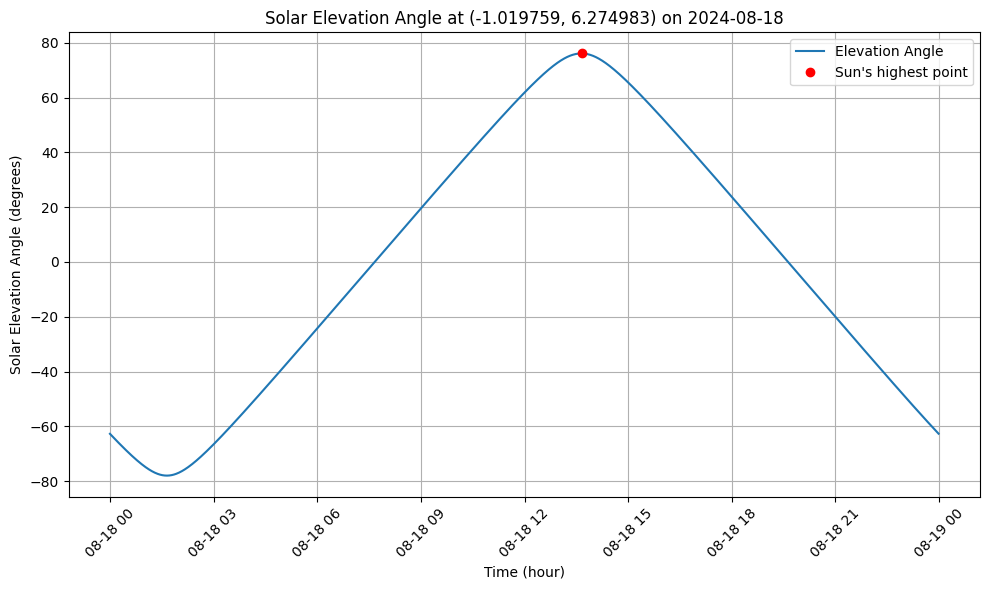

Highest elevation angle: 76.13°


In [12]:
from scipy.signal import find_peaks
import random
from datetime import datetime, timedelta

# Generate random latitude and longitude within the desired ranges
random_latitude = random.uniform(-90, 90)
random_longitude = random.uniform(-9.29, 18.52)
random_place_name = f"({random_latitude:.6f}, {random_longitude:.6f})"
random_site = Location(
    random_latitude, random_longitude, tidszone, 40, random_place_name
)

# Create a new solar position object with the random coordinates
random_solpos = random_site.get_solarposition(times)

# Generate a random month, and day
random_month = random.randint(1, 12)
if random_month in [4, 6, 9, 11]:  # April, June, September, November have 30 days
    random_day = random.randint(1, 30)
elif random_month == 2:  # February has 28 days (we're not considering leap years)
    random_day = random.randint(1, 28)
else:
    random_day = random.randint(1, 31)
random_dato = f"2024-{random_month:02d}-{random_day:02d}"

# Find local maxima (highest points) in the elevation angle data
elevation_data = random_solpos.loc[random_dato]['elevation'].values
maxima_indices, _ = find_peaks(elevation_data)

# Plot the elevation angle data
plt.figure(figsize=(10, 6))
plt.plot(random_solpos.loc[random_dato].index, elevation_data, label='Elevation Angle')

# Plot markers for the local maxima
maxima_times = random_solpos.loc[random_dato].index[maxima_indices]
maxima_elevations = elevation_data[maxima_indices]
plt.plot(maxima_times, maxima_elevations, 'ro', label="Sun's highest point")

plt.title(f"Solar Elevation Angle at {random_site.name} on {random_dato}")
plt.xlabel("Time (hour)")
plt.ylabel("Solar Elevation Angle (degrees)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Highest elevation angle: {maxima_elevations[0]:.2f}°")

## Opgave 7
> Skriv en Python-funktion (til brug med NumPy arrays) der omregner fra solens zenit og azimuth til solens position angivet i $xyz$-koordinaten. Husk om I regner i radianer eller grader. Her kan `np.deg2rad()`-funktionen være nyttig. Det er fint at bruge en cirka værdi for $r_{s}$ men man kan finde en mere korrekt værdi ved: `pvlib.solarposition.nrel_earthsun_distance(times) * 149597870700`, hvor `149597870700` er antal meter på en astronomisk enhed AU.

In [13]:
import numpy as np

def zenith_azimuth_to_xyz(zenith, azimuth, valgt_dato):
    # Calculates the distance to the sun at the chosen date
    distance = pvlib.solarposition.nrel_earthsun_distance(valgt_dato) * 149597870700
    
    # Convert zenith and azimuth from degrees to radians
    zenith_rad = np.deg2rad(zenith)
    azimuth_rad = np.deg2rad(azimuth)

    # Calculate the position in xyz coordinates
    x = distance * np.sin(zenith_rad) * np.cos(azimuth_rad)
    y = distance * np.sin(zenith_rad) * np.sin(azimuth_rad)
    z = distance * np.cos(zenith_rad)

    return x.iloc[0], y.iloc[0], z.iloc[0]

x, y, z = zenith_azimuth_to_xyz(45, 180, "2024-06-20")
print(f"Sun's position (in meters): {x}x, {y}y, {z}z")

Sun's position (in meters): -107488661165.05048x, 1.3163564484041347e-05y, 107488661165.05048z


## Opgave 8
> Skriv en Python funktion der omregner fra solens position på himlen i et $xyz$ koordinater til zenit og azimuth (i grader eller radianer). Her kan `np.arctan2(y, x)` og `np.rad2deg()` være nyttige.

In [14]:
import numpy as np

def xyz_to_zenith_azimuth(x, y, z):
    # Calculate the distance from the observer to the sun
    distance = np.sqrt(x**2 + y**2 + z**2)

    # Calculate the zenith angle (elevation angle)
    zenith_rad = np.arcsin(z / distance)
    zenith_deg = np.rad2deg(zenith_rad)

    # Calculate the azimuth angle
    azimuth_rad = np.arctan2(y, x)
    azimuth_deg = np.rad2deg(azimuth_rad)

    # Ensure azimuth angle is in the range [0, 360)
    azimuth_deg = (azimuth_deg + 360) % 360

    return zenith_deg, azimuth_deg

# Example usage:
x = -107488661165.05048  # Example x coordinate
y = 1.3163564484041347e-05  # Example y coordinate
z = 107488661165.05048  # Example z coordinate

zenith, azimuth = xyz_to_zenith_azimuth(x, y, z)
print(f"Zenith angle: {zenith} degrees, and Azimuth angle: {azimuth} degrees")

Zenith angle: 45.00000000000001 degrees, and Azimuth angle: 180.0 degrees
